In [8]:

import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import shiny
os.getcwd()

'c:\\Users\\c624fd2\\notes\\private\\img_value_analyser'

In [9]:
imgpath = "./test.jpg"
img = cv2.imread(imgpath,0)

In [12]:
# define a function to analyse grayscale values of image
# the function takes an image as input and returns a plot with the image and the histogram
def get_image_info(img):    
    # first, define break points to get 10 equal sized bins
    breaks = np.linspace(0, 255, 11)
    print(breaks)
    # the min value of the 4th bin (index 3) is the lower threshold for midtones 
    # convert to integer to use it as index
    mid_lower = breaks[3].min().astype(int)
    # righthand side of the 7th bin (index 6) is the upper threshold for midtones
    mid_upper = breaks[6].max().astype(int)
    print(mid_lower, mid_upper)
    plt.subplot(1,2,1)
    plt.imshow(img,cmap='gray')
    plt.title('image')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(1,2,2)
    hist,bin = np.histogram(img.ravel(),256,[0,255])
    plt.xlim([0,255])
    plt.plot(hist)
    plt.title('histogram')
    # add vertical threshold line at midtones > 100 and < 150
    plt.axvline(x= mid_lower, color='r', linestyle='--')
    plt.axvline(x=mid_upper, color='r', linestyle='--')
    # fill area under the curve between 100 and 150
    plt.fill_between(bin[mid_lower:mid_upper], hist[mid_lower:mid_upper], color='grey', alpha=0.5)
    # fill area under the curve between 0 and 100
    plt.fill_between(bin[:mid_lower], hist[:mid_lower], color='black', alpha=0.7)
    # calculate the area under the curve between 100 and 150 with the relative area size
    area_midtone = np.sum(hist[mid_lower:mid_upper]) / np.sum(hist)
    area_lights = np.sum(hist[:mid_lower]) / np.sum(hist)
    area_darks = np.sum(hist[mid_upper:]) / np.sum(hist)
    # add text to the plot in percentage
    # calculate lower quantile of the y-axis to place the text in the middle of the plot
    ymid = np.quantile(hist, 0.5)
    plt.text(mid_lower+5, ymid, str(round(area_midtone*100, 2)) + '%', color='red', fontdict={'size': 8})
    plt.text(10, ymid, str(round(area_lights*100, 2)) + '%', color='red', fontdict={'size': 8})
    plt.text(mid_upper+5, ymid, str(round(area_darks*100, 2)) + '%', color='red', fontdict={'size': 8})
    # return the plot   
    return  plt.show()




[  0.   25.5  51.   76.5 102.  127.5 153.  178.5 204.  229.5 255. ]
76 153


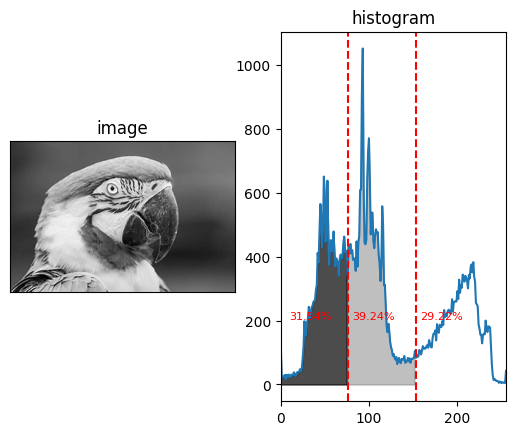

In [13]:
get_image_info(img)